Means of numerical columns:
 SalePrice    251000.0
LotSize        6020.0
YearBuilt      2001.3
dtype: float64
Unique value counts in categorical columns:
 Series([], dtype: float64)
Missing value percentages:
 SalePrice    0.0
LotSize      0.0
YearBuilt    0.0
dtype: float64


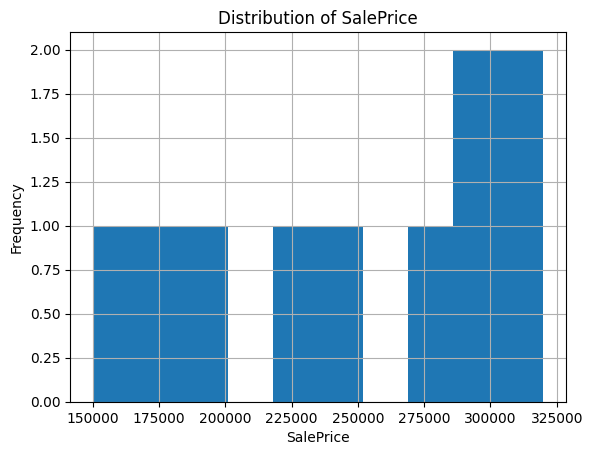

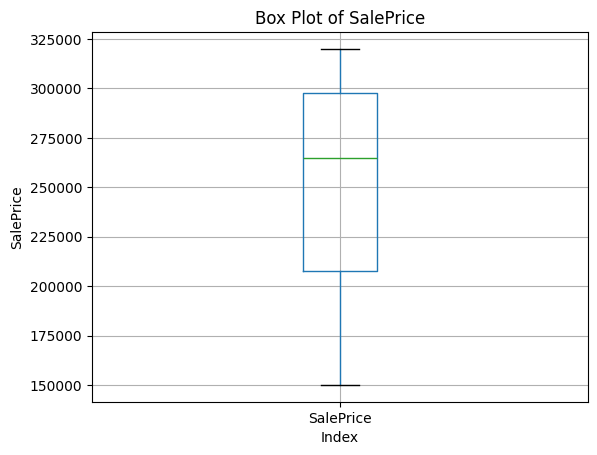

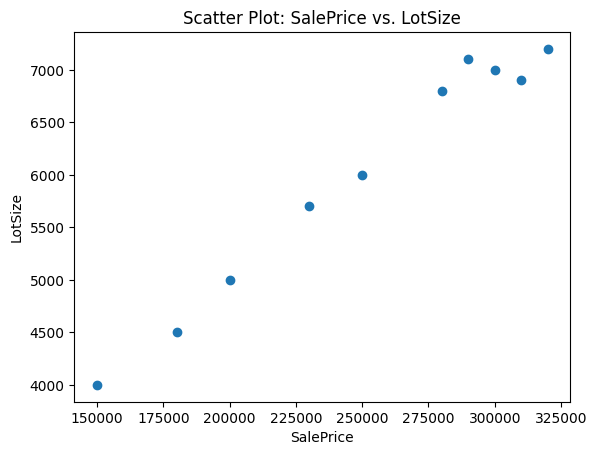

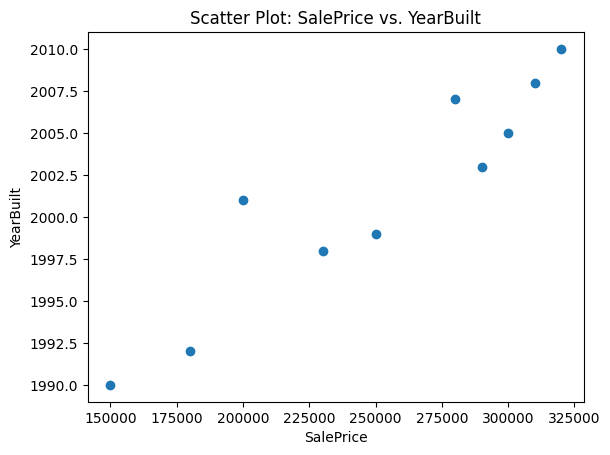

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


def calculate_numerical_means(df):
    """Calculate the mean of each numerical column in the DataFrame.

    Args:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.Series: A Series containing the mean of each numerical column.
    """
    numerical_means = df.select_dtypes(include='number').mean()
    return numerical_means


def count_unique_categorical_values(df):
    """Count the number of unique values in each categorical column.

    Args:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.Series: A Series containing the unique value counts for each categorical column.
    """
    unique_counts = df.select_dtypes(include='object').nunique()
    return unique_counts


def calculate_missing_value_percentages(df):
    """Calculate the percentage of missing values for each column.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.Series: A Series containing the percentage of missing values for each column.
    """
    # Calculate missing value percentages by column
    missing_percentages = df.isnull().sum() * 100 / len(df)
    return missing_percentages


def plot_histogram_for_column(df, column_name):
    """
    Creates a histogram for the specified numerical column in a DataFrame.

    Args:
    df (pandas.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the numerical column to plot the histogram for.

    Returns:
    None
    """
    plt.figure()
    df[column_name].hist()
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {column_name}")
    plt.show()


def plot_box_plot_for_column(df, column_name):
    """
    Creates a box plot for the specified column in the given DataFrame.

    Args:
    df (pandas.DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column for which to create the box plot.

    Returns:
    None
    """
    plt.figure()
    df.boxplot(column=column_name)
    plt.xlabel("Index")  # or appropriate label for the x-axis
    plt.ylabel(column_name)
    plt.title(f"Box Plot of {column_name}")
    plt.show()


def plot_scatter_plots_for_pairs(df, base_column, comparison_columns):
    """
    Creates scatter plots comparing the base column with each specified comparison column.

    Args:
    df (pandas.DataFrame): The DataFrame containing the data.
    base_column (str): The name of the base column to compare against.
    comparison_columns (list of str): A list of column names to compare with the base column.

    Returns:
    None
    """
    for col in comparison_columns:
        plt.figure()
        plt.scatter(df[base_column], df[col])
        plt.xlabel(base_column)
        plt.ylabel(col)
        plt.title(f"Scatter Plot: {base_column} vs. {col}")
        plt.show()


# Load the CSV file
file_path = '/workspaces/clean_code/test_files/test_scatter.csv'
df = pd.read_csv(file_path)

# Calculate means
numerical_means = calculate_numerical_means(df)
print("Means of numerical columns:\n", numerical_means)

# Count unique values
unique_counts = count_unique_categorical_values(df)
print("Unique value counts in categorical columns:\n", unique_counts)

# Calculate missing value percentages
missing_percentages = calculate_missing_value_percentages(df)
print("Missing value percentages:\n", missing_percentages)

# Plot histogram for a specific column (e.g., 'Age')
plot_histogram_for_column(df, "SalePrice")

# Plot box plot for 'SalePrice'
plot_box_plot_for_column(df, "SalePrice")

# Example: Scatter plots for "SalePrice" vs. "LotSize" and "YearBuilt"
plot_scatter_plots_for_pairs(df, "SalePrice", ["LotSize", "YearBuilt"])
